# Machine Learning applied to MuJoCo environment – Forward Kinematics

* ### Author: Mowibox (Ousmane THIONGANE)
* ### Date: November 4th, 2024

## Imports

In [159]:
import os
from utils import *
import numpy as np
from tensorflow.keras.models import load_model

## I - Loading the models

In [160]:
models_dir = 'models'
MODELS_2R = []
MODELS_3R = []
MODELS_5R = []

if os.path.exists(models_dir) and os.path.isdir(models_dir):
    for filename in os.listdir(models_dir):
        filepath = os.path.join(models_dir, filename)
        if os.path.isfile(filepath) and filename.endswith('.keras'):
            if '2R' in filename:
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                print(f"2R Model found : {filename}")
                MODELS_2R.append(model)
            elif '3R' in filename:
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                print(f"3R Model found : {filename}")
                MODELS_3R.append(model)
            elif '5R' in filename:
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                print(f"5R Model found : {filename}")
                MODELS_5R.append(model)
else:
    print(f"The folder '{models_dir}' does not exists!")


print(f"Number of 2R models : {len(MODELS_2R)}")
print(f"Number of 3R models : {len(MODELS_3R)}")
print(f"Number of 5R models : {len(MODELS_5R)}")

2R Model found : NN1_2R_p10_e20.keras
3R Model found : NN1_3R_p10_e20.keras
5R Model found : NN1_5R_p80_e20.keras
2R Model found : NN2_2R_p10_e20.keras
2R Model found : NN2_2R_p10_e20_raw.keras
3R Model found : NN2_3R_p10_e20.keras
3R Model found : NN2_3R_p10_e20_raw.keras
5R Model found : NN2_5R_p75_e20_raw.keras
5R Model found : NN2_5R_p80_e20.keras
Number of 2R models : 3
Number of 3R models : 3
Number of 5R models : 3


## II - Direct Kinematics & Jacobian Matrix

### 2.1) 2R robot

Example with (j0, j1) = (0, 0)
End-effector predicted X-position: 0.2162848711013794
End-effector predicted Y-position: -0.003325209952890873


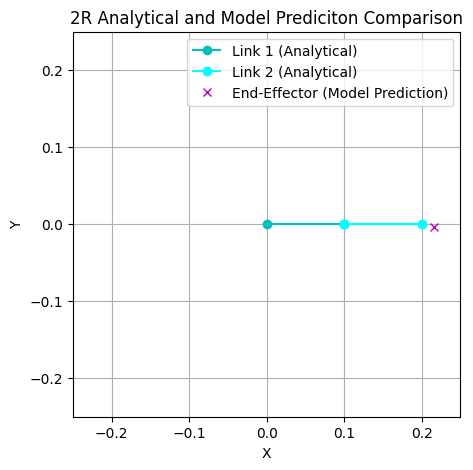

Distance error: 0.016620891914074464

Example with (j0, j1) = (1.5707963267948966, 1.5707963267948966)
End-effector predicted X-position: -0.11836019903421402
End-effector predicted Y-position: 0.0985262468457222


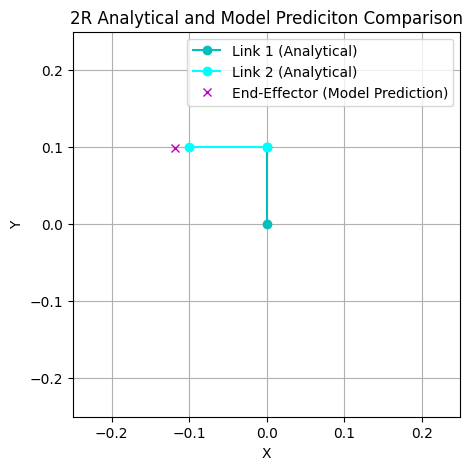

Distance error: 0.01841925234464464

Example with (j0, j1) = (1.5707963267948966, 0.7853981633974483)
End-effector predicted X-position: -0.06282708048820496
End-effector predicted Y-position: 0.17697863280773163


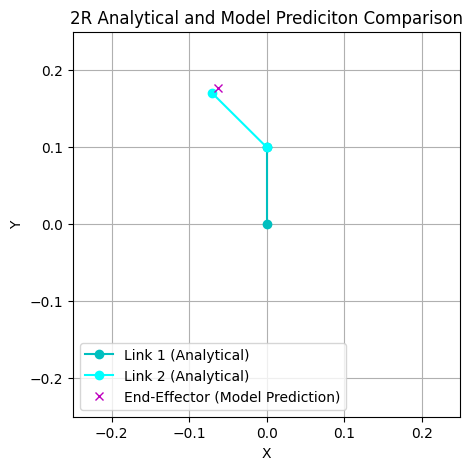

Distance error: 0.010071661609841465



In [161]:
model_2R = MODELS_2R[0].model
name_2R = MODELS_2R[0].get_name()

if 'raw' in name_2R:
    raw = True
else: 
    raw = False

THETA_LST = [(0, 0), (np.pi/2, np.pi/2), (np.pi/2, np.pi/4)]

for theta in THETA_LST:
    ee_x_pred, ee_y_pred = FK(model_2R, theta, raw)
    print(f"Example with (j0, j1) = {theta}")
    print(f"End-effector predicted X-position: {ee_x_pred}")
    print(f"End-effector predicted Y-position: {ee_y_pred}")
    result_model = FK(model_2R, theta, raw)  
    dispFK_2R(result_model, theta, display_error=True)

In [162]:
theta = [np.pi/4, np.pi/2]  

learned_J = FK_Jacobian_pred(model_2R, theta, raw)
print(f"Jacobian Matrix predicted:\n{learned_J}")

analytical_J = FK_Jacobian_analytic_2R(theta)
print(f"Jacobian Matrix analytical:\n{learned_J}")

Jacobian Matrix predicted:
[[-0.14184234 -0.07257816]
 [-0.02069278 -0.05869772]]
Jacobian Matrix analytical:
[[-0.14184234 -0.07257816]
 [-0.02069278 -0.05869772]]


### 2.2) 3R robot

Example with (j0, j1, j2) = (0, 0, 0)
End-effector predicted X-position: 0.3242282271385193
End-effector predicted Y-position: -0.009838370606303215


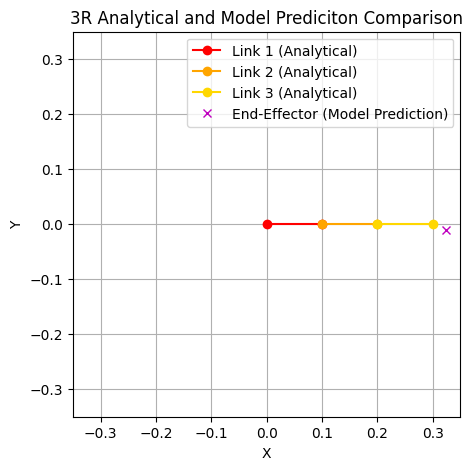

Distance error: 0.026149579852507217

Example with (j0, j1, j2) = (0.7853981633974483, 0.7853981633974483, 0.7853981633974483)
End-effector predicted X-position: -0.005944684147834778
End-effector predicted Y-position: 0.2273363173007965


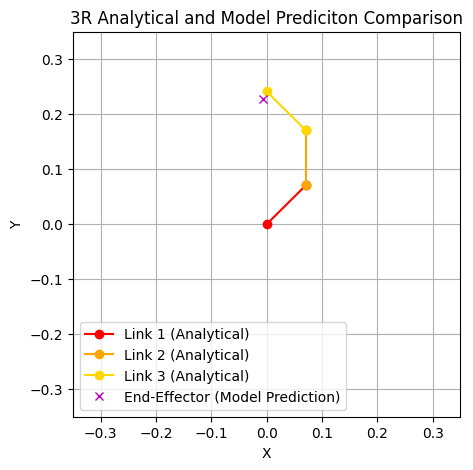

Distance error: 0.015288151996255345

Example with (j0, j1, j2) = (0, 1.5707963267948966, 1.5707963267948966)
End-effector predicted X-position: 0.007342062890529633
End-effector predicted Y-position: 0.09545499831438065


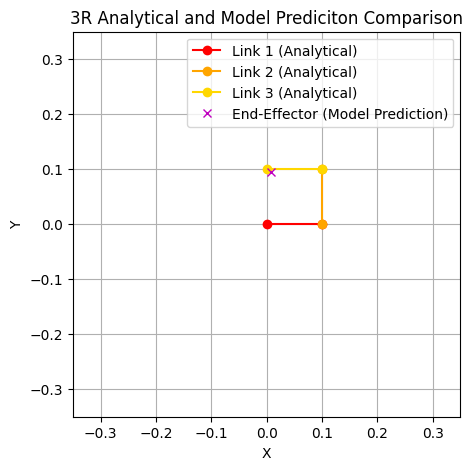

Distance error: 0.008634982791573778



In [163]:
model_3R = MODELS_3R[0].model
name_3R = MODELS_3R[0].get_name()

if 'raw' in name_3R:
    raw = True
else: 
    raw = False

THETA_LST = [(0, 0, 0), (np.pi/4, np.pi/4, np.pi/4), (0, np.pi/2, np.pi/2)]

for theta in THETA_LST:
    ee_x_pred, ee_y_pred = FK(model_3R, theta, raw)
    print(f"Example with (j0, j1, j2) = {theta}")
    print(f"End-effector predicted X-position: {ee_x_pred}")
    print(f"End-effector predicted Y-position: {ee_y_pred}")
    result_model = FK(model_3R, theta, raw)  
    dispFK_3R(result_model, theta, display_error=True)


In [164]:
theta = [np.pi/4, np.pi/5, np.pi/4]  

learned_J = FK_Jacobian_pred(model_3R, theta, raw)
print(f"Jacobian Matrix predicted:\n{learned_J}")

analytical_J = FK_Jacobian_analytic_3R(theta)
print(f"Jacobian Matrix analytical:\n{analytical_J}")


Jacobian Matrix predicted:
[[-0.24344878 -0.0859645  -0.05304325]
 [ 0.07433262  0.05429395 -0.06362332]]
Jacobian Matrix analytical:
[[-0.25038121 -0.17967053 -0.0809017 ]
 [ 0.0275756  -0.04313508 -0.05877853]]


### 2.3) 5R robot

In [165]:
model_5R = MODELS_5R[0].model
name_5R = MODELS_5R[0].get_name()

if 'raw' in name_5R:
    raw = True
else: 
    raw = False

THETA_LST = [(0, 0, 0, 0, 0), (np.pi/4, np.pi/4, np.pi/4, np.pi/4, -np.pi/2)]

for theta in THETA_LST:
    ee_x_pred, ee_y_pred, ee_z_pred = FK(model_5R, theta, raw)
    print(f"Example with (j0, j1, j2, j3, j4) = {theta}")
    print(f"End-effector predicted X-position: {ee_x_pred}")
    print(f"End-effector predicted Y-position: {ee_y_pred}")
    print(f"End-effector predicted Z-position: {ee_z_pred}")
    print("\n")

Example with (j0, j1, j2, j3, j4) = (0, 0, 0, 0, 0)
End-effector predicted X-position: -0.012585103511810303
End-effector predicted Y-position: -0.020190119743347168
End-effector predicted Z-position: 0.5741288065910339


Example with (j0, j1, j2, j3, j4) = (0.7853981633974483, 0.7853981633974483, 0.7853981633974483, 0.7853981633974483, -1.5707963267948966)
End-effector predicted X-position: 0.08217976987361908
End-effector predicted Y-position: 0.2751207649707794
End-effector predicted Z-position: 0.11125291138887405




In [166]:
theta = [np.pi/4, np.pi/2, np.pi/4, np.pi/4, np.pi/4]  

learned_J = FK_Jacobian_pred(model_5R, theta, raw)
print(f"Jacobian Matrix predicted:\n{learned_J}")

Jacobian Matrix predicted:
[[-0.06174457 -0.12377492 -0.17017429 -0.14422844  0.03039688]
 [ 0.22905713 -0.06376262 -0.14246833 -0.09064981 -0.05987756]
 [-0.01091878 -0.07851069 -0.02234431  0.04485467  0.0660169 ]]


## III - Global Mean Absolute Error (MAE)

### 3.1) 2R robot

In [167]:
theta_values = np.linspace(0, 2*np.pi, 50)

for model in MODELS_2R:
    model_2R = model.model
    name_2R =  model.get_name()
    if 'raw' in name_2R:
        raw = True
    else: 
        raw = False

    mae_values = []
    for j0 in theta_values:
        for j1 in theta_values:
            theta = [j0, j1]

            learned_J = FK_Jacobian_pred(model_2R, theta, raw)
            analytical_J = FK_Jacobian_analytic_2R(theta)

            mae = (np.linalg.norm(learned_J - analytical_J))
            mae_values.append(mae)

    global_mae = np.mean(mae_values)
    print(f"Model: '{name_2R[:-6]}' Global MAE: {global_mae}")

Model: 'NN1_2R_p10_e20' Global MAE: 0.06318403035402298
Model: 'NN2_2R_p10_e20' Global MAE: 0.037344664335250854
Model: 'NN2_2R_p10_e20_raw' Global MAE: 0.19838641583919525


### 3.2) 3R robot

In [168]:
theta_values = np.linspace(0, 2*np.pi, 12)

for model in MODELS_3R:
    model_3R = model.model
    name_3R =  model.get_name()
    if 'raw' in name_3R:
        raw = True
    else: 
        raw = False

    mae_values = []
    for j0 in theta_values:
        for j1 in theta_values:
            for j2 in theta_values:
                theta = [j0, j1, j2]

                learned_J = FK_Jacobian_pred(model_3R, theta, raw)
                analytical_J = FK_Jacobian_analytic_3R(theta)

                mae = (np.linalg.norm(learned_J - analytical_J))
                mae_values.append(mae)

    global_mae = np.mean(mae_values)
    print(f"Model '{name_3R[:-6]}' Global MAE: {global_mae}")

Model 'NN1_3R_p10_e20' Global MAE: 0.1985860913991928
Model 'NN2_3R_p10_e20' Global MAE: 0.09953592717647552
Model 'NN2_3R_p10_e20_raw' Global MAE: 0.27080038189888
